# Clustering

El **Clustering** es la tarea de agrupar objetos por similitud, en grupos o conjuntos de manera que los miembros del mismo grupo tengan características similares. Es la tarea principal de la minería de datos exploratoria y es una técnica común en el análisis de datos estadísticos.

<img src="images/clust.png" width="480" height="300" align="center"/>


## K-means

### Teoría

El algoritmo [K-means](https://es.wikipedia.org/wiki/K-means)  (MacQueen, 1967) agrupa las observaciones en un número predefinido de $k$ clusters de forma que, la suma de las varianzas internas de los clusters, sea lo menor posible.

Existen varias implementaciones de este algoritmo, la más común de ellas se conoce como Lloyd’s. En la bibliografía es común encontrar los términos inertia, within-cluster sum-of-squares o varianza intra-cluster para referirse a la varianza interna de los clusters.

Considérense  $𝐶_1 ,...,  𝐶_k$  como los sets formados por los índices de las observaciones de cada uno de los clusters. Por ejemplo, el set  $𝐶_1$  contiene los índices de las observaciones agrupadas en el cluster 1. La nomenclatura empleada para indicar que la observación  $i$ pertenece al cluster  $k$  es:  $i \in C_k$ . Todos los sets satisfacen dos propiedades:

* $C_1 \cup C_2 \cup ... \cup C_k = {1,...,n} $ . Significa que toda observación pertenece a uno de los $k$ clusters.

* $C_i \cap C_{j} = \emptyset $   para todo $i \neq j$   . Implica que los clusters no solapan, ninguna observación pertenece a más de un cluster a la vez.

El algoritmo consiste en reducir al mínimo la suma de las distancias cuadradas desde la media dentro del agrupamiento. Matemáticamente:
\begin{align*}
(P) \ \textrm{Minimizar } f(C_l,\mu_l) = \sum_{l=1}^k \sum_{x_n \in C_l} ||x_n - \mu_l ||^2 \textrm{, respecto a } C_l, \mu_l,
\end{align*}
donde $C_l$ es el cluster l-ésimo y $\mu_l$ es el centroide l-ésimo.

<img src="images/kmean_01.png" width="480" height="300" align="center"/>


### Algoritmo


1. Especificar el número $k$ de clusters que se quieren crear.
2. Seleccionar de forma aleatoria $k$ observaciones del set de datos como centroides iniciales.
3. Asignar cada una de las observaciones al centroide más cercano.
4. Para cada uno de los $k$ clusters generados en el paso 3, recalcular su centroide.

Repetir los pasos 3 y 4 hasta que las asignaciones no cambien o se alcance el número máximo de iteraciones establecido.

El problema anterior es NP-hard (imposible de resolver en tiempo polinomial, del tipo más difícil de los probleams NP).

### Ventajas y desventajas


K-means es uno de los métodos de clustering más utilizados. Destaca por la sencillez y velocidad de su algoritmo, sin embargo, presenta una serie de limitaciones que se deben tener en cuenta.

* Requiere que se indique de antemano el número de clusters que se van a crear. Esto puede ser complicado si no se dispone de información adicional sobre los datos con los que se trabaja. Se han desarrollado varias estrategias para ayudar a identificar potenciales valores óptimos de $k$ (elbow, shilouette), pero todas ellas son orientativas.

* Dificultad para detectar clusters alargados o con formas irregulares.

* Las agrupaciones resultantes pueden variar dependiendo de la asignación aleatoria inicial de los centroides. Para minimizar este problema, se recomienda repetir el proceso de clustering entre 25-50 veces y seleccionar como resultado definitivo el que tenga menor suma total de varianza interna. Aun así, solo se puede garantizar la reproducibilidad de los resultados si se emplean semillas.

* Presenta problemas de robustez frente a outliers.

### Aplicación 

Veamos un ejemplo de análisis no supervisado ocupando el algoritmo **k-means**.

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets import make_blobs

pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [21]:
def init_blobs(N, k, seed=42):
    X, y = make_blobs(n_samples=N, centers=k,
                      random_state=seed, cluster_std=0.60)
    return X

# generar datos
data = init_blobs(10000, 6, seed=43)
df = pd.DataFrame(data, columns=["x", "y"])



df.head()

,x,y
0,-6.953617,-4.989933
1,-2.681117,7.583914
2,-1.510161,4.933676
3,-9.748491,5.479457
4,-7.438017,-4.597754


Debido a que trabajamos con el concepto de distancia, muchas veces las columnas del dataframe pueden estar en distintas escalas, lo cual puede complicar a los algoritmos ocupados (al menos con **sklearn**). 

En estos casos, se suele **normalizar** los atributos, es decir, dejar los valores en una escala acotada y/o con estimadores fijos. Por ejemplo, en ***sklearn** podemos encontrar las siguientes formas de normalizar:

* **StandardScaler**: se normaliza  restando la media y escalando por su desviación estanda.
$$x_{prep} = \dfrac{x-u}{s}$$

La ventaja es que la media del nuevo conjunto de datos cumple con la propiedad que su media $\mu$ es igual a cero y su desviación estandar $s$ es igual a 1.
* **MinMaxScaler**:  se normaliza ocupando los valores de los mínimos y máximo del conjunto de datos.
$$x_{prep} = \dfrac{x-x_{min}}{x_{min}-x_{max}}$$

Esta forma de normalizar resulta útil cuando la desviación estandar $s$ es muy pequeña (cercana) a cero, por lo que lo convierte en un estimador más roubusto que el **StandardScaler**.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = ['x', 'y']
df[columns] = scaler.fit_transform(df[columns])

df.head()

,x,y
0,-0.579033,-1.831435
1,0.408821,1.194578
2,0.679560,0.556774
3,-1.225241,0.688121
4,-0.691032,-1.737053


In [23]:
# comprobar resultados del estimador
df.describe()

,x,y
count,1.000000e+04,1.000000e+04
mean,2.060574e-16,-2.285105e-15
std,1.000050e+00,1.000050e+00
min,-1.638247e+00,-2.410317e+00
25%,-8.015576e-01,-4.418042e-01
50%,-2.089351e-01,1.863259e-01
75%,5.480066e-01,8.159808e-01
max,2.243358e+00,1.639547e+00


Con esta parametrización procedemos a graficar nuestros resultados:

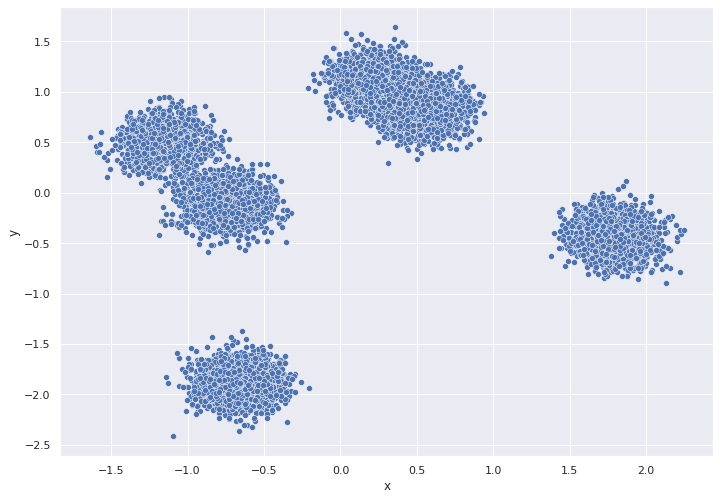

In [24]:
# graficar 
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot( data=df,x="x", y="y")

Ahora ajustamos el algoritmo **KMeans** de **sklearn**. Primero, comprendamos los hiperparámetros más importantes:

- **n_clusters**: El número de clusters a crear, o sea **K**. Por defecto es 8
- **init**: Método de inicialización. Un problema que tiene el algoritmo K-Medias es que la solucción alcanzada varia según la inicialización de los centroides. `sklearn` empieza usando el método `kmeans++` que es una versión más moderna y que proporciona mejores resultados que la inicialización aleatoria (random)
- **n_init**: El número de inicializaciones a probar. Básicamente `KMeans` aplica el algoritmo `n_init` veces y elige los clusters que minimizan la inercia.
- **max_iter**: Máximo número de iteraciones para llegar al criterio de parada.
- **random_state**: semilla para garantizar la reproducibilidad de los resultados.
- **tol**: Tolerancia para declarar criterio de parada (cuanto más grande, antes parará el algoritmo).

In [27]:
# ajustar modelo: k-means

from sklearn.cluster import KMeans

X = np.array(df)
kmeans = KMeans(n_clusters=6,n_init=25, random_state=123)
kmeans.fit(X)


centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [28]:
# etiquetar los datos con los clusters encontrados
df["cluster"] = clusters
df["cluster"] = df["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=["x", "y"])
centroids_df["cluster"] = [1,2,3,4,5,6]

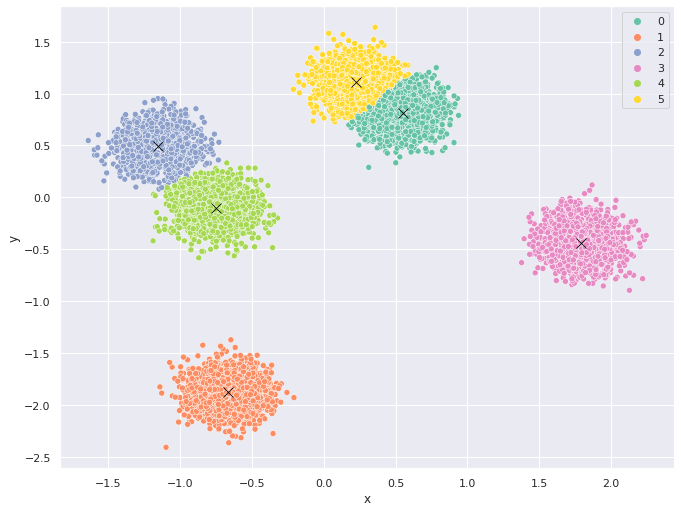

In [30]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))

sns.scatterplot( data=df,
                     x="x",
                     y="y",
                     hue="cluster",
                     legend='full',
                     palette="Set2")

sns.scatterplot(x="x", y="y",
                     s=100, color="black", marker="x",
                     data=centroids_df)
plt.show()

Ahora la pregunta que surge de manera natural es ... ¿ cómo escoger el mejor número de clusters?. 

No existe un criterio objetivo ni ampliamente válido para la  elección de un número óptimo de clusters. Aunque no exista un criterio objetivo para la selección del número de clusters, si que se han implementado diferentes métodos que nos ayudan a elegir un número apropiado de clusters para agrupar los datos; como son,

* método del codo (elbow method)
* criterio de Calinsky
* Affinity Propagation (AP)
* Gap (también con su versión estadística)
* Dendrogramas 
* etc.



#### Regla del codo

Este método utiliza los valores de la función de perdida, $f(C_l,\mu_l)$, obtenidos tras aplicar el $K$-means a diferente número de Clusters (desde 1 a $N$ clusters).

Una vez obtenidos los valores de la función de pérdida  tras aplicar el K-means de 1 a $N$ clusters, representamos en una gráfica lineal la función de pérdida  respecto del número de clusters. 

En esta gráfica se debería de apreciar un cambio brusco en la evolución de la función de pérdida, teniendo la línea representada una forma similar a la de un brazo y su codo. 

El punto en el que se observa ese cambio brusco en la función de pérdida nos dirá el número óptimo de clusters a seleccionar para ese data set; o dicho de otra manera: el punto que representaría al codo del brazo será el número óptimo de clusters para ese data set
.

In [9]:
# implementación de la regla del codo
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,1,49337.951600
1,2,20004.858535
2,3,12733.014667
3,4,6760.679396
4,5,3139.657771


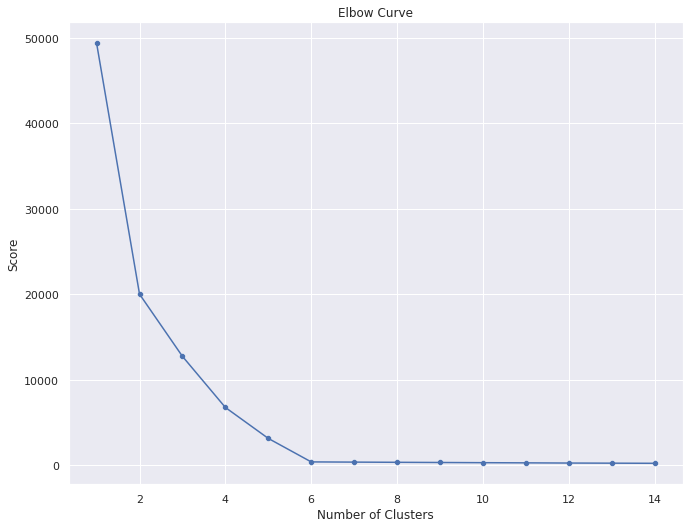

In [10]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

A partir de 4 clusters la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que $k$ = 4 es una buena opción.

## Hierarchical clustering

### Teoría

Hierarchical clustering es una alternativa a los métodos de partitioning clustering que no requiere que se pre-especifique el número de clusters. Los métodos que engloba el hierarchical clustering se subdividen en dos tipos dependiendo de la estrategia seguida para crear los grupos:

* **Aglomerativo** (agglomerative clustering o bottom-up): el agrupamiento se inicia con todas las observaciones separadas, cada una formando un cluster individual. Los clusters se van combinado a medida que la estructura crece hasta converger en uno solo.


* **Divisivo** (divisive clustering o top-down): es la estrategia opuesta al aglomerativo. Se inicia con todas las observaciones contenidas en un mismo cluster y se suceden divisiones hasta que cada observación forma un cluster* individual.

En ambos casos, los resultados pueden representarse de forma muy intuitiva en una estructura de árbol llamada dendrograma.

### Algoritmo

#### Aglomerativo

El algoritmo seguido para por el clustering aglomerativo es:

1. Considerar cada una de las n observaciones como un cluster individual, formando así la base del dendrograma (hojas).

2. Proceso iterativo hasta que todas las observaciones pertenecen a un único cluster:
    * Calcular la distancia entre cada posible par de los n clusters. El investigador debe determinar el tipo de medida empleada para cuantificar la similitud entre observaciones o grupos (distancia y linkage).

    * Los dos clusters más similares se fusionan, de forma que quedan n-1 clusters.


3. Cortar la estructura de árbol generada (dendrograma) a una determinada altura para crear los clusters finales.

Para que el proceso de agrupamiento pueda llevarse a cabo tal como indica el algoritmo anterior, es necesario definir cómo se cuantifica la similitud entre dos clusters. Es decir, se tiene que extender el concepto de distancia entre pares de observaciones para que sea aplicable a pares de grupos, cada uno formado por varias observaciones. A este proceso se le conoce como linkage. A continuación, se describen los 5 tipos de linkage más empleados y sus definiciones.

* **Complete or Maximum**: se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La mayor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida más conservadora (maximal intercluster dissimilarity).

* **Single or Minimum**: se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. La menor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida menos conservadora (minimal intercluster dissimilarity).

* **Average**: Se calcula la distancia entre todos los posibles pares formados por una observación del cluster A y una del cluster B. El valor promedio de todas ellas se selecciona como la distancia entre los dos clusters (mean intercluster dissimilarity).

* **Centroid**: Se calcula el centroide de cada uno de los clusters y se selecciona la distancia entre ellos como la distancia entre los dos clusters.

* **Ward**: Se trata de un método general. La selección del par de clusters que se combinan en cada paso del agglomerative hierarchical clustering se basa en el valor óptimo de una función objetivo, pudiendo ser esta última cualquier función definida por el analista. El método Ward's minimum variance es un caso particular en el que el objetivo es minimizar la suma total de varianza intra-cluster. En cada paso, se identifican aquellos 2 clusters cuya fusión conlleva menor incremento de la varianza total intra-cluster. Esta es la misma métrica que se minimiza en K-means.

Los métodos de complete, average y Ward's minimum variance suelen ser los preferidos por los analistas debido a que generan dendrogramas más compensados. Sin embargo, no se puede determinar que uno sea mejor que otro, ya que depende del caso de estudio en cuestión. Por ejemplo, en genómica, se emplea con frecuencia el método de centroides. Junto con los resultados de un proceso de hierarchical clustering siempre hay que indicar qué distancia se ha empleado, así como el tipo de linkage, ya que, dependiendo de estos, los resultados pueden variar en gran medida.

#### Divisivo

El algoritmo más conocido de divisive hierarchical clustering es DIANA (DIvisive ANAlysis Clustering). Este algoritmo se inicia con un único cluster que contiene todas las observaciones. A continuación, se van sucediendo divisiones hasta que cada observación forma un cluster independiente. En cada iteración, se selecciona el cluster con mayor diámetro, entendiendo por diámetro de un cluster la mayor de las diferencias entre dos de sus observaciones. Una vez seleccionado el cluster, se identifica la observación más dispar, que es aquella con mayor distancia promedio respecto al resto de observaciones que forman el cluster. Esta observación inicia el nuevo cluster. Se reasignan las observaciones en función de si están más próximas al nuevo cluster o al resto de la partición, dividiendo así el cluster seleccionado en dos nuevos clusters.

1. Todas las $n$ observaciones forman un único cluster.
2. Repetir hasta que haya $n$ clusters:
    * Calcular para cada cluster la mayor de las distancias entre pares de observaciones (diámetro del cluster).
    * Seleccionar el cluster con mayor diámetro.
    * Calcular la distancia media de cada observación respecto a las demás.
    * La observación más distante inicia un nuevo cluster.
    * Se reasignan las observaciones restantes al nuevo cluster o al viejo dependiendo de cuál está más próximo.

A diferencia del clustering aglomerativo, en el que hay que elegir un tipo de distancia y un método de linkage, en el clustering divisivo solo hay que elegir la distancia, no hay linkage.

### Dendograma

Los resultados del hierarchical clustering pueden representarse como un árbol en el que las ramas representan la jerarquía con la que se van sucediendo las uniones de clusters.

Supóngase que se dispone de 45 observaciones en un espacio de dos dimensiones, a los que se les aplica hierarchical clustering para intentar identificar grupos. El siguiente dendrograma representa los resultados obtenidos.

<img src="images/hc_01.png"  align="center"/>


En la base del dendrograma, cada observación forma una terminación individual conocida como hoja o leaf del árbol. A medida que se asciende por la estructura, pares de hojas se fusionan formando las primeras ramas. Estas uniones se corresponden con los pares de observaciones más similares. También ocurre que las ramas se fusionan con otras ramas o con hojas. Cuanto más temprana (más próxima a la base del dendrograma) ocurre una fusión, mayor es la similitud.

Para cualquier par de observaciones, se puede identificar el punto del árbol en el que las ramas que contienen dichas observaciones se fusionan. La altura a la que esto ocurre (eje vertical) indica cómo de similares/diferentes son las dos observaciones. Los dendrogramas, por lo tanto, se deben interpretar únicamente en base al eje vertical y no por las posiciones que ocupan las observaciones en el eje horizontal, esto último es simplemente por estética y puede variar de un programa a otro.

Por ejemplo, la observación 8 es la más similar a la 10 ya que es la primera fusión que recibe la observación 10 (y viceversa). Podría resultar tentador decir que la observación 14, situada inmediatamente a la derecha de la 10, es la siguiente más similar, sin embargo, las observaciones 28 y 44 son más similares a la 10 a pesar de que se encuentran más alejadas en el eje horizontal. Del mismo modo, no es correcto decir que la observación 14 es más similar a la observación 10 de lo que lo es la 36 por el hecho de que está más próxima en el eje horizontal. Prestando atención a la altura en que las respectivas ramas se unen, la única conclusión válida es que la similitud entre los pares 10-14 y 10-36 es la misma.

**Cortar el dendograma para generar los clusters**


Además de representar en un dendrograma la similitud entre observaciones, se tiene que identificar el número de clusters creados y qué observaciones forman parte de cada uno. Si se realiza un corte horizontal a una determinada altura del dendrograma, el número de ramas que sobrepasan (en sentido ascendente) dicho corte se corresponde con el número de clusters. La siguiente imagen muestra dos veces el mismo dendrograma. Si se realiza el corte a la altura de 5, se obtienen dos clusters, mientras que si se hace a la de 3.5 se obtienen 4. La altura de corte tiene por lo tanto la misma función que el valor K en K-means-clustering: controla el número de clusters obtenidos.

<img src="images/hc_02.png" width="600" height="600"  align="center"/>
<img src="images/hc_03.png" width="600" height="600"  align="center"/>


Dos propiedades adicionales se derivan de la forma en que se generan los clusters en el método de hierarchical clustering:

* Dada la longitud variable de las ramas, siempre existe un intervalo de altura para el que cualquier corte da lugar al mismo número de clusters. En el ejemplo anterior, todos los cortes entre las alturas 5 y 6 tienen como resultado los mismos 2 clusters.

* Con un solo dendrograma se dispone de la flexibilidad para generar cualquier número de clusters desde 1 a n. La selección del número óptimo puede valorarse de forma visual, tratando de identificar las ramas principales en base a la altura a la que ocurren las uniones. En el ejemplo expuesto es razonable elegir entre 2 o 4 clusters.

### Aplicación

In [108]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [109]:
# generar datos
X, y = make_blobs(
        n_samples    = 200, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )


df = pd.DataFrame({
    'x':X[:,0],
    'y':X[:,1]
})


# Escalado de datos
scaler = StandardScaler()
columns = ['x', 'y']
df[columns] = scaler.fit_transform(df[columns])

df.head()

,x,y
0,1.348818,-0.908114
1,-0.638621,-0.534950
2,0.653079,0.027910
3,-1.573023,1.276049
4,0.970706,-1.418431


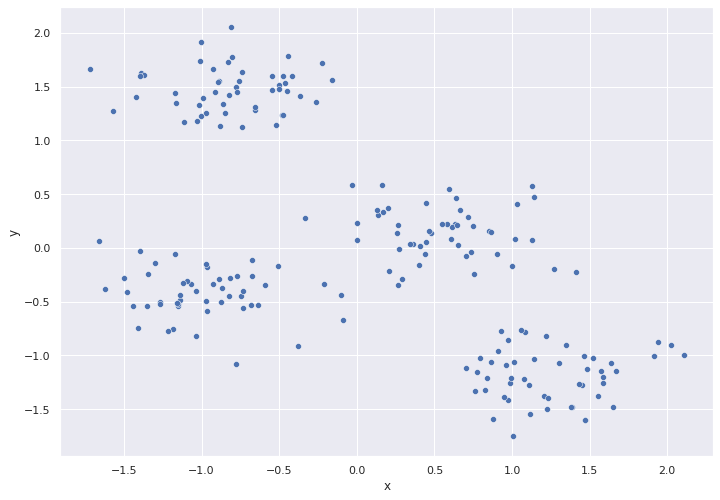

In [110]:
# graficar 
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot( data=df,x="x", y="y")

In [ ]:
# Modelos

X = np.array(df[['x','y']])

In [ ]:
# primer modelo
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X)

In [ ]:
# segundo modelo
modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X)

In [113]:
# tercer modelo
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [116]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

Text(0.5, 1.0, 'Distancia euclídea, Linkage average')

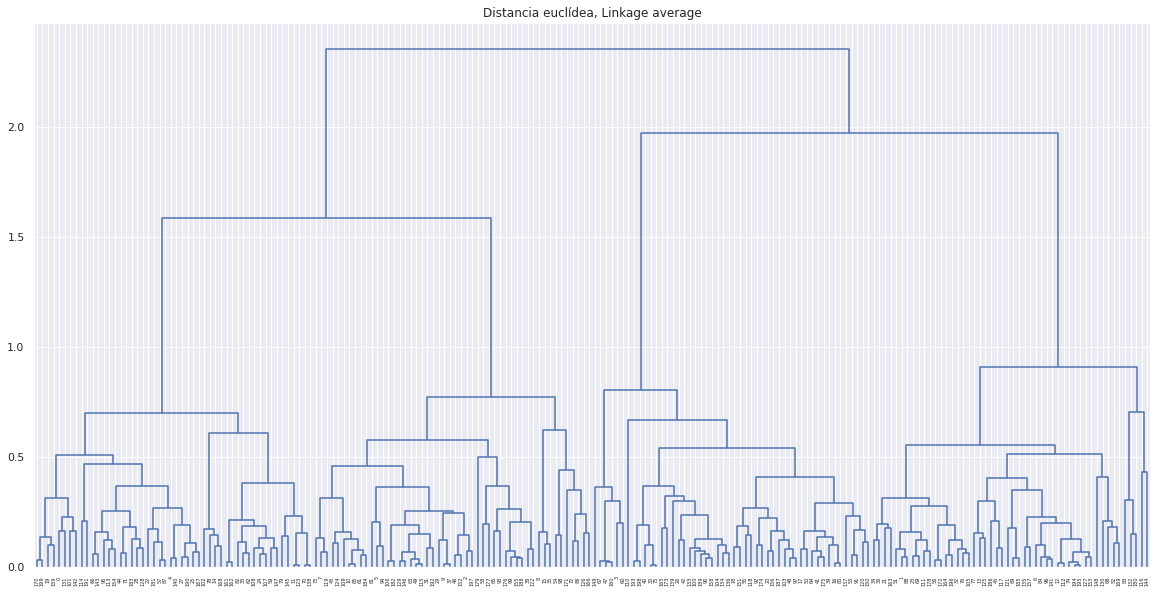

In [119]:
# Dendrogramas
plt.figure(figsize=(20,10)) 
plot_dendrogram(modelo_hclust_average, color_threshold=0)
plt.title("Distancia euclídea, Linkage average")
plt.show()

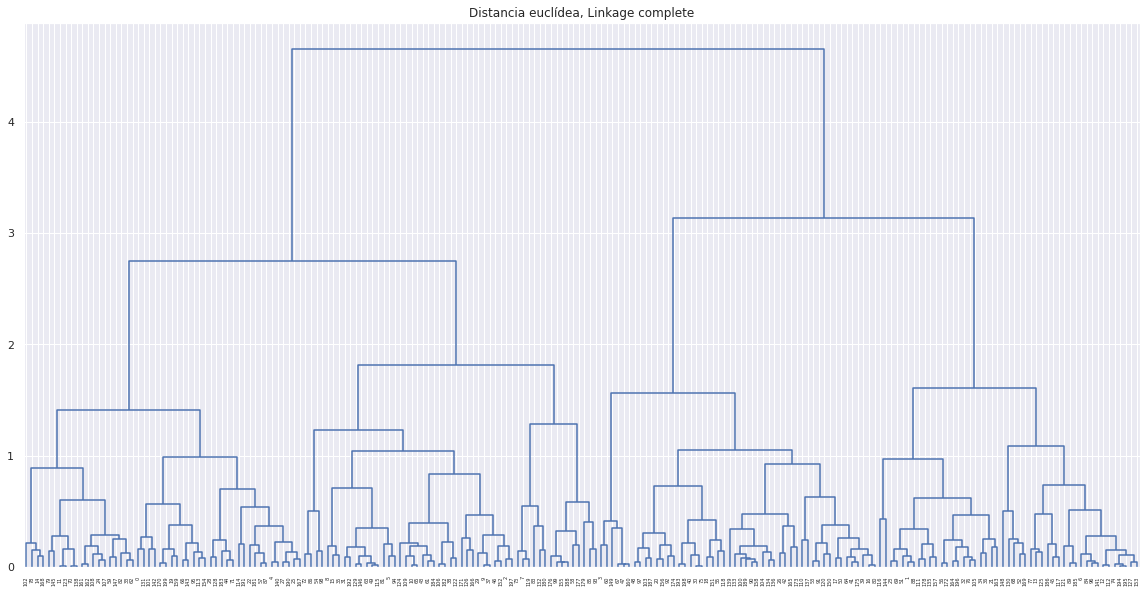

In [120]:
# Dendrogramas
plt.figure(figsize=(20,10)) 
plot_dendrogram(modelo_hclust_complete, color_threshold=0)
plt.title("Distancia euclídea, Linkage complete")
plt.show()

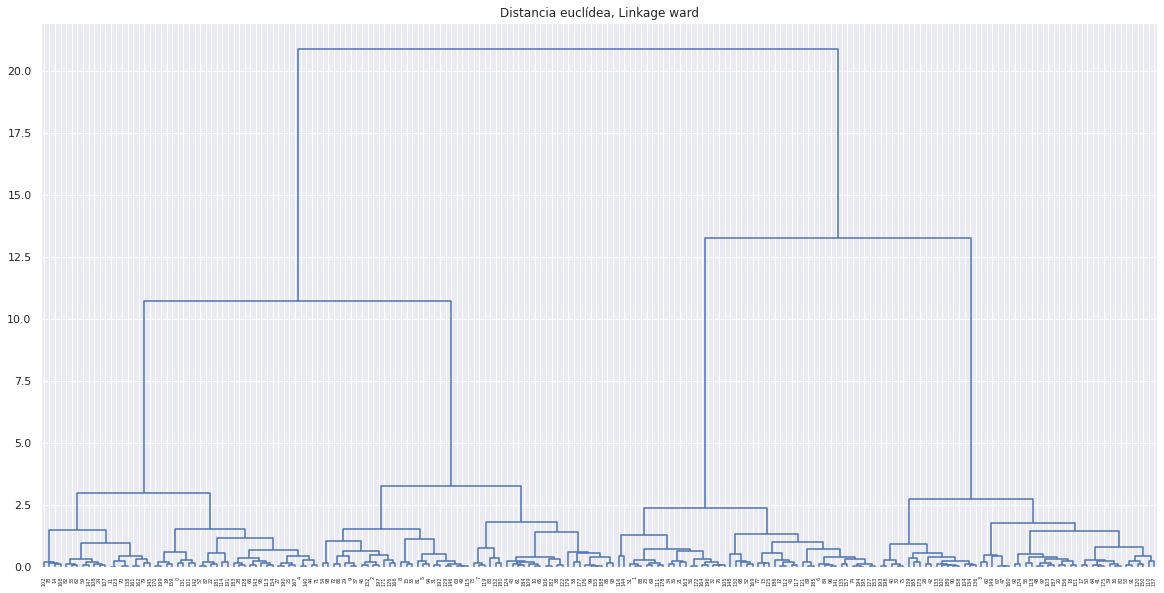

In [121]:
# Dendrogramas
plt.figure(figsize=(20,10)) 
plot_dendrogram(modelo_hclust_ward, color_threshold=0)
plt.title("Distancia euclídea, Linkage ward")
plt.show()

En este caso, los tres tipos de linkage identifican claramente 4 clusters, si bien esto no significa que en los 3 dendrogramas los clusters estén formados por exactamente las mismas observaciones.

**Número de clusters**

Una forma de identificar el número de clusters, es inspeccionar visualmente el dendograma y decidir a qué altura se corta para generar los clusters. Por ejemplo, para los resultados generados mediante distancia euclídea y linkage ward, parece sensato cortar el dendograma a una altura de entre 5 y 10, de forma que se creen 4 clusters.

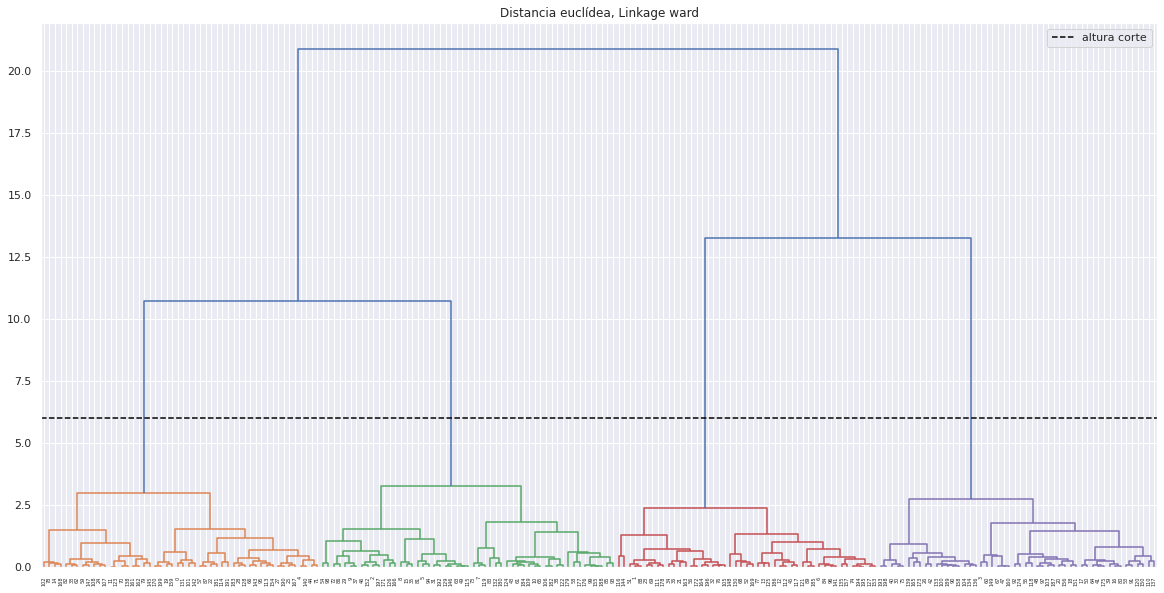

In [124]:
plt.figure(figsize=(20,10)) 
altura_corte = 6
plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte)
plt.title("Distancia euclídea, Linkage ward")
plt.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
plt.legend()
plt.show()

Una vez identificado el número óptimo de clusters, se reentrena el modelo indicando este valor.

## Density based clustering (DBSCAN)

### Teoría

Density-based spatial clustering of applications with noise (DBSCAN) fue presentado en 1996 por Ester et al. como una forma de identificar clusters siguiendo el modo intuitivo en el que lo hace el cerebro humano, identificando regiones con alta densidad de observaciones separadas por regiones de baja densidad.

<img src="images/dbs_01.png" width="480" height="300" align="center"/>


El cerebro humano identifica fácilmente 5 agrupaciones y algunas observaciones aisladas (ruido). Véanse ahora los clusters que se obtienen si se aplica, por ejemplo, K-means clustering.

<img src="images/dbs_02.png" width="480" height="300" align="center"/>


Los clusters generados distan mucho de representar las verdaderas agrupaciones. Esto es así porque los métodos de partitioning clustering como k-means, hierarchical, k-medoids, ... son buenos encontrando agrupaciones con forma esférica o convexa que no contengan un exceso de outliers o ruido, pero fallan al tratar de identificar formas arbitrarias. De ahí que el único cluster que se corresponde con un grupo real sea el amarillo.

DBSCAN evita este problema siguiendo la idea de que, para que una observación forme parte de un cluster, tiene que haber un mínimo de observaciones vecinas dentro de un radio de proximidad y de que los clusters están separados por regiones vacías o con pocas observaciones.

El algoritmo DBSCAN necesita dos parámetros:

* Epsilon  ($\epsilon$) : radio que define la región vecina a una observación, también llamada  𝜖 -neighborhood.
* Minimum points ($min_samples$): número mínimo de observaciones dentro de la región epsilon.

Empleando estos dos parámetros, cada observación del set de datos se puede clasificar en una de las siguientes tres categorías:

* **Core point**: observación que tiene en su  𝜖 -neighborhood un número de observaciones vecinas igual o mayor a min_samples.

* **Border point**: observación no satisface el mínimo de observaciones vecinas para ser core point pero que pertenece al  $\epsilon$-neighborhood de otra observación que sí es core point.

* **Noise-outlier**: observación que no es core point ni border point.

Por último, empleando las tres categorías anteriores se pueden definir tres niveles de conectividad entre observaciones:

* Directamente alcanzable (direct density reachable): una observación  $A$  es directamente alcanzable desde otra observación  $B$  si  $A$  forma parte del  $\epsilon$ -neighborhood de  $B$  y  $B$  es un core point. Por definición, las observaciones solo pueden ser directamente alcanzables desde un core point.

* Alcanzable (density reachable): una observación  $A$  es alcanzable desde otra observación  $𝐵$  si existe una secuencia de core points que van desde  $B$  a  $A$ .

* Densamente conectadas (density conected): dos observaciones $A$  y  $B$  están densamente conectadas si existe una observación core point  $C$  tal que  $A$  y  $B$  son alcanzables desde  $C$ .

La siguiente imagen muestra las conexiones existentes entre un conjunto de observaciones si se emplea  $min_samples = 4$ . La observación  $A$  y el resto de observaciones marcadas en rojo son core points, ya que todas ellas contienen al menos 4 observaciones vecinas (incluyéndose a ellas mismas) en su  $\epsilon$-neighborhood. Como todas son alcanzables entre ellas, forman un cluster. Las observaciones  $B$  y  $C$  no son core points pero son alcanzables desde  $A$  a través de otros core points, por lo tanto, pertenecen al mismo cluster que  $A$ . La observación  $N$  no es ni un core point ni es directamente alcanzable, por lo que se considera como ruido.

<img src="images/dbs_03.png" width="480" height="300" align="center"/>


### Algoritmo


1. Para cada observación $x_i$ calcular la distancia entre ella y el resto de observaciones. Si en su  $epsilon$ -neighborhood hay un número de observaciones $\geq min_samples$  marcar la observación como core point, de lo contrario marcarla como visitada.

2. Para cada observación  $x_i$   marcada como core point, si todavía no ha sido asignada a ningún cluster, crear uno nuevo y asignarla a él. Encontrar recursivamente todas las observaciones densamente conectadas a ella y asignarlas al mismo cluster.

3. Iterar el mismo proceso para todas las observaciones que no hayan sido visitadas.

4. Aquellas observaciones que tras haber sido visitadas no pertenecen a ningún cluster se marcan como outliers.

Como resultado, todo cluster cumple dos propiedades: todos los puntos que forman parte de un mismo cluster están densamente conectados entre ellos y, si una observación $A$  es densamente alcanzable desde cualquier otra observación de un cluster, entonces $A$  también pertenece al cluster.

### Hiperparámetros


Como ocurre en muchas otras técnicas estadísticas, en DBSCAN no existe una forma única y exacta de encontrar el valor adecuado de epsilon  ($\epsilon$))  y  $min_samples$) . A modo orientativo se pueden seguir las siguientes premisas:

* $min_samples$ : cuanto mayor sea el tamaño del set de datos, mayor debe ser el valor mínimo de observaciones vecinas. En el libro Practical Guide to Cluster Analysis in R recomiendan no bajar nunca de 3. Si los datos contienen niveles altos de ruido, aumentar  $min_samples$  favorecerá la creación de clusters significativos menos influenciados por outliers.

* epsilon ($\epsilon$): una buena forma de escoger el valor de $\epsilon$  es estudiar las distancias promedio entre las  $k = minsamples𝑠$  observaciones más próximas. Al representar estas distancias en función de  $\epsilon$ , el punto de inflexión de la curva suele ser un valor óptimo. Si el valor de  $\epsilon$ escogido es muy pequeño, una proporción alta de las observaciones no se asignarán a ningún cluster, por el contrario, si el valor es demasiado grande, la mayoría de observaciones se agruparán en un único cluster.

#### Ventajas y desventajas


* Ventajas
    * No requiere que el usuario especifique el número de clusters.
    * Es independiente de la forma que tengan los clusters.
    * Puede identificar outliers, por lo que los clusters generados no se ven influenciados por ellos.


* Desventajas

    * Es un método determinístico siempre y cuando el orden de los datos sea el mismo. Los border points que son alcanzables desde más de un cluster pueden asignarse a uno u otro dependiendo del orden en el que se procesen los datos.

    * No genera buenos resultados cuando la densidad de los grupos es muy distinta, ya que no es posible encontrar los parámetros  𝜖  y min_samples que sirvan para todos a la vez.

### Aplicación 

Veamos un ejemplo de análisis no supervisado ocupando el algoritmo **DBSCAN**.

In [34]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("data/multishape.csv")
df.head()

,x,y,shape
0,-0.803739,-0.853053,1
1,0.852851,0.367618,1
2,0.927180,-0.274902,1
3,-0.752626,-0.511565,1
4,0.706846,0.810679,1


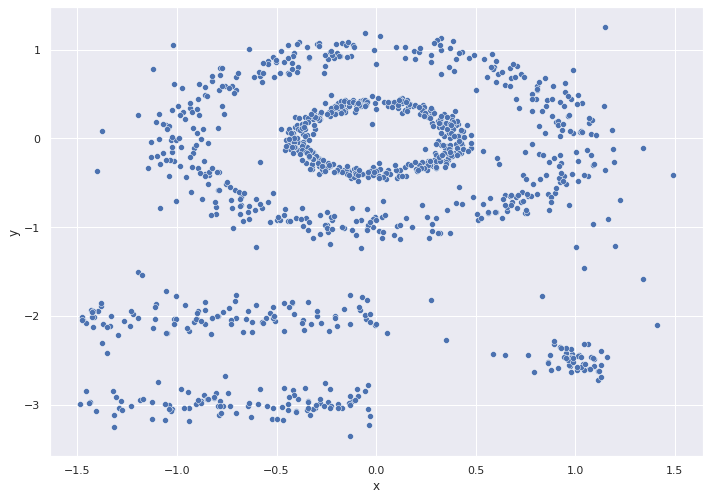

In [39]:
# graficar 
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot( data=df,x="x", y="y")

In [40]:
# Escalado de datos
scaler = StandardScaler()
columns = ['x', 'y']
df[columns] = scaler.fit_transform(df[columns])
df.head()

,x,y,shape
0,-1.120749,-0.193616,1
1,1.448907,0.844692,1
2,1.564203,0.298161,1
3,-1.041463,0.096855,1
4,1.222429,1.221561,1


In [42]:
# Modelo
X = np.array(df[['x','y']])

modelo_dbscan = DBSCAN(
                    eps          = 0.2,
                    min_samples  = 5,
                    metric       = 'euclidean',
                )


modelo_dbscan.fit(X)

DBSCAN(eps=0.2)

In [49]:
# agregar labels
df['labels'] = modelo_dbscan.labels_

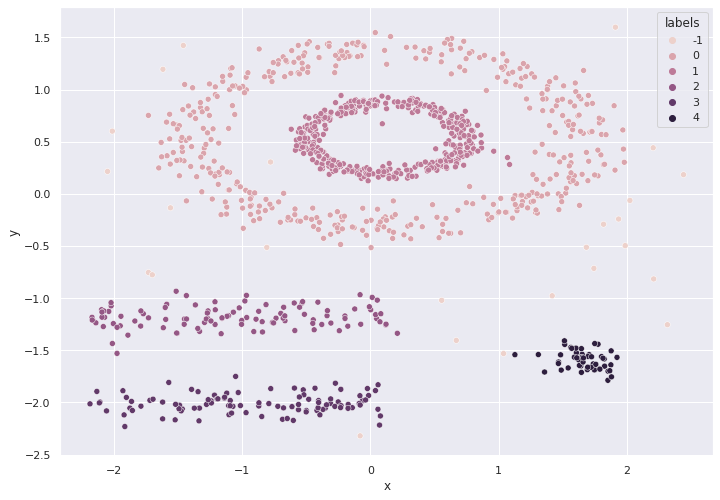

In [61]:
# graficar 
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot( data=df,x="x", y="y",hue = "labels")

In [65]:
# Número de clusters y observaciones "outliers"
n_clusters = len(set(df['labels'])) - (1 if -1 in df['labels'] else 0)
n_noise    = list(df['labels']).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Número de clusters encontrados: 6
Número de outliers encontrados: 25


## Gaussian mixture models (GMMs)

### Teoría  

Un [Gaussian Mixture model](https://brilliant.org/wiki/gaussian-mixture-model/) es un modelo probabilístico en el que se considera que las observaciones siguen una distribución probabilística formada por la combinación de múltiples distribuciones normales (componentes). En su aplicación al clustering, puede entenderse como una generalización de *K-means* con la que, en lugar de asignar cada observación a un único cluster, se obtiene una probabilidad de pertenencia a cada uno.

Para estimar los parámetros que definen la función de distribución de cada cluster (media y matriz de covarianza) se recurre al algoritmo de Expectation-Maximization (EM). Una vez aprendidos los parámetros, se puede calcular la probabilidad que tiene cada observación de pertenecer a cada cluster y asignarla a aquel con mayor probabilidad.

<img src="images/gmm_01.png"  align="center"/>


### Algoritmo


Junto con el número de clusters (componentes), hay que determinar el tipo de matriz de covarianza que pueden tener los clusters. Dependiendo del tipo de matriz, la forma de los clusters puede ser:

* tied: todos los clusters comparten la misma matriz de covarianza.

* diagonal: las dimensiones de cada cluster a lo largo de cada dimensión puede ser distinto, pero las elipses generadas siempre quedan alineadas con los ejes, es decir, su orientaciones son limitadas.

* spherical: las dimensiones de cada cluster son las mismas en todas las dimensiones. Esto permite generar clusters de distinto tamaño pero todos esféricos.

* full: cada cluster puede puede ser modelado como una elipse cualquier orientación y dimensiones.

### Aplicación

In [66]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [104]:
# generar datos
X, y = make_blobs(
        n_samples    = 300, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )


df = pd.DataFrame({
    'x':X[:,0],
    'y':X[:,1]
})


# Escalado de datos
scaler = StandardScaler()
columns = ['x', 'y']
df[columns] = scaler.fit_transform(df[columns])

df.head()

,x,y
0,0.516255,-0.707227
1,-0.861664,1.329068
2,0.711174,0.437049
3,-0.619792,1.485573
4,0.782282,-0.801378


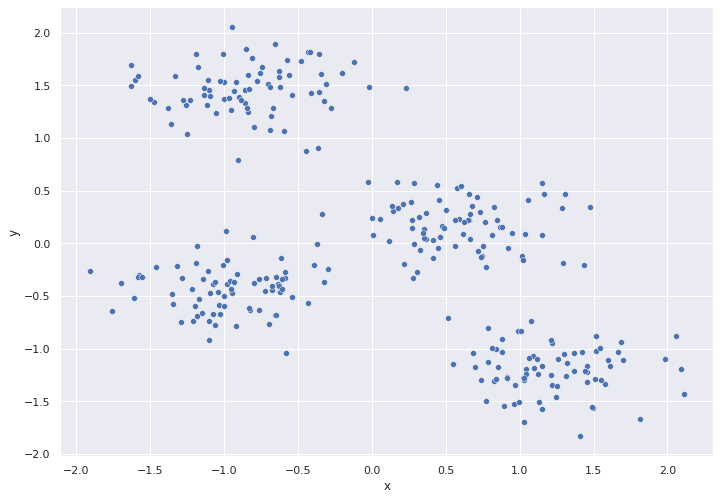

In [105]:
# graficar 
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot( data=df,x="x", y="y")

In [90]:
# Modelo

X = np.array(df[['x','y']])
modelo_gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=123)
modelo_gmm.fit(X=X)

GaussianMixture(n_components=4, random_state=123)

In [91]:
# Media de cada componente
modelo_gmm.means_

array([[ 0.57844185,  0.17292982],
       [ 1.2180002 , -1.19725866],
       [-0.96910551, -0.44143927],
       [-0.83710796,  1.46219241]])

In [92]:
# Matriz de covarianza de cada componente
modelo_gmm.covariances_

array([[[ 0.14277634, -0.00527707],
        [-0.00527707,  0.05201453]],

       [[ 0.12745218, -0.00619666],
        [-0.00619666,  0.05157763]],

       [[ 0.12131004,  0.00243031],
        [ 0.00243031,  0.04602115]],

       [[ 0.15451151,  0.0068188 ],
        [ 0.0068188 ,  0.05660383]]])

**Predicción y clasificación**

Una vez entrenado el modelo GMMs, se puede predecir la probabilidad que tiene cada observación de pertenecer a cada una de las componentes (clusters). Para obtener la clasificación final, se asigna a la componente con mayor probabilidad

In [93]:
# Probabilidades
# ==============================================================================
# Cada fila es una observación y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
probabilidades = modelo_gmm.predict_proba(X)
probabilidades

array([[2.59319058e-02, 9.71686641e-01, 2.38145325e-03, 8.05199375e-21],
       [7.16006205e-09, 7.13831446e-33, 2.34989165e-15, 9.99999993e-01],
       [9.99999970e-01, 8.78380305e-12, 9.13663813e-09, 2.04805600e-08],
       ...,
       [9.99965889e-01, 4.92493619e-10, 3.41016281e-05, 8.75675460e-09],
       [3.01319652e-06, 6.45628361e-30, 1.52897049e-18, 9.99996987e-01],
       [4.39337172e-07, 1.99785604e-11, 9.99999561e-01, 4.05381245e-15]])

In [94]:
# Clasificación (asignación a la componente de mayor probabilidad)
# ==============================================================================
# Cada fila es una observación y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
clasificacion = modelo_gmm.predict(X)
clasificacion

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [95]:
# Representación gráfica
# ==============================================================================
# Codigo obtenido de:
# https://github.com/amueller/COMS4995-s20/tree/master/slides/aml-14-clustering-mixture-models 
def make_ellipses(gmm, ax):
    for n in range(gmm.n_components):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        
        for i in range(1,3):
            ell = mpl.patches.Ellipse(gmm.means_[n], i*v[0], i*v[1],
                                      180 + angle, color="blue")
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.1)
            ax.add_artist(ell)
        

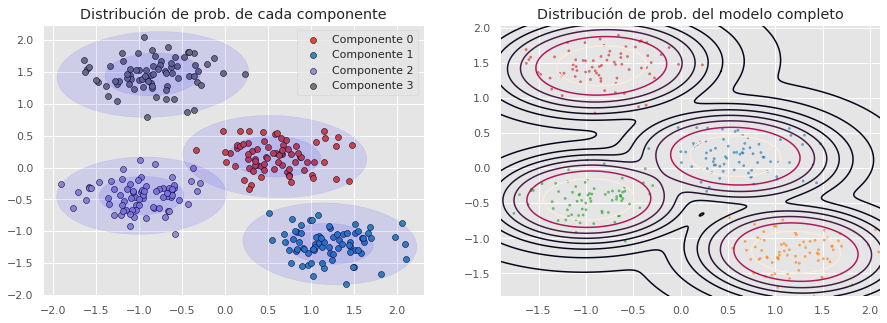

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Distribución de probabilidad de cada componente
for i in np.unique(clasificacion):
    axs[0].scatter(
        x = X[clasificacion == i, 0],
        y = X[clasificacion == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Componente {i}"
    )

make_ellipses(modelo_gmm, ax = axs[0])
axs[0].set_title('Distribución de prob. de cada componente')
axs[0].legend()


# Distribución de probabilidad del modelo completo
xs = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
ys = np.linspace(min(X[:, 1]), max(X[:, 1]), 1000)
xx, yy = np.meshgrid(xs, ys)
scores = modelo_gmm.score_samples(np.c_[xx.ravel(), yy.ravel()], )
axs[1].scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(clasificacion))
scores = np.exp(scores) # Las probabilidades están en log
axs[1].contour(
    xx, yy, scores.reshape(xx.shape),
    levels=np.percentile(scores, np.linspace(0, 100, 10))[1:-1]
)
axs[1].set_title('Distribución de prob. del modelo completo');

**Número de clusters**

Dado que los modelos GMM son modelos probabilísticos, se puede recurrir a métricas como el Akaike information criterion (AIC) o Bayesian information criterion (BIC) para identificar cómo de bien se ajustan los datos observados a modelo creado.

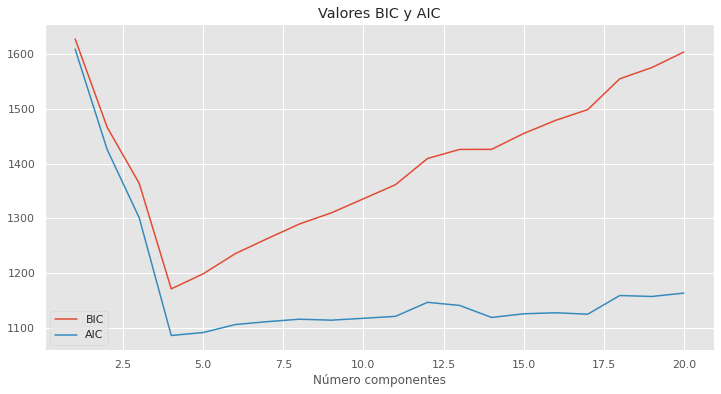

In [100]:
n_components = range(1, 21)
valores_bic = []
valores_aic = []

for i in n_components:
    modelo = GaussianMixture(n_components=i, covariance_type="full")
    modelo = modelo.fit(X)
    valores_bic.append(modelo.bic(X))
    valores_aic.append(modelo.aic(X))

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.plot(n_components, valores_bic, label='BIC')
ax.plot(n_components, valores_aic, label='AIC')
ax.set_title("Valores BIC y AIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [101]:
print(f"Número óptimo acorde al BIC: {range(1, 21)[np.argmin(valores_bic)]}")
print(f"Número óptimo acorde al AIC: {range(1, 21)[np.argmin(valores_aic)]}")

Número óptimo acorde al BIC: 4
Número óptimo acorde al AIC: 4


Ambas métricas identifican el 4 como número óptimo de clusters (componentes).

## Limitaciones del clustering


El clustering puede ser una herramienta muy útil para encontrar agrupaciones en los datos, sobre todo a medida que el volumen de los mismos aumenta. Sin embargo, es importante recordar sus limitaciones o problemas que pueden surgir al aplicarlo. Algunas de ellas son:

* Pequeñas decisiones pueden tener grandes consecuencias:a la hora de utilizar los métodos de clustering se tienen que tomar decisiones que influyen en gran medida en los resultados obtenidos. No existe una única respuesta correcta, por lo que en la práctica se prueban diferentes opciones.
    * Escalado y centrado de las variables
    * Qué medida de distancia/similitud emplear
    * Número de clusters
    * Tipo de linkage empleado en hierarchical clustering
    * A que altura establecer el corte de un dendrograma


* Validación de los clusters obtenidos: no es fácil comprobar la validez de los resultados ya que en la mayoría de escenarios se desconoce la verdadera agrupación.


* Falta de robustez: los métodos de K-means-clustering e hierarchical clustering asignan obligatoriamente cada observación a un grupo. Si existe en la muestra algún outlier, a pesar de que realmente no pertenezca a ningún grupo, el algoritmo lo asignará a uno de ellos provocando una distorsión significativa del cluster en cuestión. Algunas alternativas son k-medoids y DBSCAN.


* La naturaleza del algoritmo de hierarchical clustering conlleva que, si se realiza una mala división en los pasos iniciales, no se pueda corregir en los pasos siguientes.

## Referencias

1. [Unsupervised learning](https://scikit-learn.org/stable/unsupervised_learning.html)
2. [Clustering con Python (Joaquín Amat Rodrigo)](https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html)